결측치 처리 

값이 아예 비어져있는 것을 결측치  
넘파이 배열에서는 결측치를 np.nan으로 표현한다.  
판다스 데이터프레임에서는 결측치를 NaN으로 표현한다.  

In [51]:
import pandas as pd 
import numpy as np 

df = pd.DataFrame( {'A' : [1,2, np.nan, 4, 5], 
                    'B' : [6,7,8,np.nan, 10], 
                    'C' : [11, 12, 13, np.nan, np.nan]})

df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


결측치의 위치를 확인하는법

판다스의 isna() 함수로 데이터프레임에서 결측치가 어디에 있는지 빠르게 확인  
데이터가 있으면 False로 표시, 결측치는 True로 표시된다. 

In [52]:
pd.isna(df)

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


열별로 결측치 개수를 확인하는법 
> sum() 함수를 이용한다. 

In [53]:
pd.isna(df).sum( ) 

A    1
B    1
C    2
dtype: int64

True의 값을 세우는 것 같다!

행별로 모든 결측치를 제거한다 

In [54]:
df_drop_nan = df.dropna( ) 
df_drop_nan

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


결측치 대체 

In [55]:
df_0 = df['C'].fillna(0)
print(df_0)

#C열에 있는 결측치를 0으로 대체한다. fillna() 함수를 사용함 

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64


In [56]:
#문자로 결측치를 대체하기 fillna인자에 문자 입력하면된다. 
df_missing = df['A'].fillna('missing')
df_missing

0        1.0
1        2.0
2    missing
3        4.0
4        5.0
Name: A, dtype: object

In [57]:
# 평균으로 결측치 대체하는법

In [58]:
df_mean = df.fillna(df.mean( ))
print(df, '\n')
print(df_mean)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A      B     C
0  1.0   6.00  11.0
1  2.0   7.00  12.0
2  3.0   8.00  13.0
3  4.0   7.75  12.0
4  5.0  10.00  12.0


In [59]:
# 결측치 바로 위나 아래 행의 값으로 대체할 수 있다. 
print(df, '\n')

df_ffill = df.fillna(method='ffill') #결측치의 위에있는 값으로 대체할려면 fillna함수에 method='ffill'
print(df_ffill, '\n')

df_bfill = df.fillna(method= 'bfill') #결측치의 아래에 있는 값으로 대체하기 위해서
print(df_bfill)

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  NaN   8.0  13.0
3  4.0   NaN   NaN
4  5.0  10.0   NaN 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  2.0   8.0  13.0
3  4.0   8.0  13.0
4  5.0  10.0  13.0 

     A     B     C
0  1.0   6.0  11.0
1  2.0   7.0  12.0
2  4.0   8.0  13.0
3  4.0  10.0   NaN
4  5.0  10.0   NaN


In [60]:
#구체적으로 결측치에 들어간 값을 지정해준다. 
fill_dict = {'A': df['A'].mean( ), 'B': '12/25', 'C': 'missing'}
df_filled = df.fillna(value=fill_dict)
df_filled

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/25,missing
4,5.0,10.0,missing


### 11월 20일

이상치

중앙값이 평균값보다 더 잘 대변해줄수있다. 

이상치의 원인 
> 데이터 입력 오류 : 수집을 잘못해서  
> 측정 오류 : 기계가 오류나서 -> 이상치의 가장 일반적인 원인  
> 자연 이상치 : 원인을 알 수없는 뭔가 이상한데 얘기하기 어려운거  

이상치의 제거 

표준화와 정규화 
> 데이터에서 특성 또는 특징이란 분석 대상에 영향을 주는 속성을 말함  
> 데이터를 분석하려면 특성들이 모두 비슷한 정도로 대상에 영향력을 행사하도록 값을 변환

In [61]:
#z score 

### 지하수 데이터 

ppt 33쪽

라이브러리 가져오기

In [62]:
import os #os는 패스를 지정할때 사용 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings #엑셀파일을 불러올때, 엑셀파일안에 기본스타일이 지정되어있지않다면(색깔글꼴) 경고메시지가 뜨는데 뜨는 경고를 없애기 위한 라이브러리임
from datetime import datetime, date, time


warnings.filterwarnings('ignore') #경고메시지 없애줌 

In [63]:
path = 'C://sweet/대전태평(암반)/' 
file_list = os.listdir(path) 
file_list_py = [file for file in file_list if file.endswith('.xlsx')] #xlsx확장자가 나타난 파일만 보여준다.
file_list_py

['대전태평(암반)_2009_hr.xlsx',
 '대전태평(암반)_2010_hr.xlsx',
 '대전태평(암반)_2011_hr.xlsx',
 '대전태평(암반)_2012_hr.xlsx',
 '대전태평(암반)_2013_hr.xlsx',
 '대전태평(암반)_2015_hr.xlsx',
 '대전태평(암반)_2016_hr.xlsx']

In [64]:
df = pd.DataFrame()
for i in file_list_py:
 data = pd.read_excel(path + i)
 df = pd.concat([df, data]) #합치라는 명령어임 
df

#요부분은 다시 봐야할듯 

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
8761,대전태평,(암반),20161231,19,16.2,44.49,725
8762,대전태평,(암반),20161231,20,16.2,44.49,725
8763,대전태평,(암반),20161231,21,16.2,44.49,725
8764,대전태평,(암반),20161231,22,16.2,44.49,725


In [65]:
df = df.reset_index(drop=True) #인덱스를 reset하라는말 
#drop= True 는 기존에 있던것을 없애버리라는 말 
df

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝)
0,대전태평,(암반),20090101,0,16.1,44.47,749
1,대전태평,(암반),20090101,1,16.1,44.47,749
2,대전태평,(암반),20090101,2,16.1,44.47,749
3,대전태평,(암반),20090101,3,16.1,44.47,749
4,대전태평,(암반),20090101,4,16.1,44.47,749
...,...,...,...,...,...,...,...
60849,대전태평,(암반),20161231,19,16.2,44.49,725
60850,대전태평,(암반),20161231,20,16.2,44.49,725
60851,대전태평,(암반),20161231,21,16.2,44.49,725
60852,대전태평,(암반),20161231,22,16.2,44.49,725


아깐 인덱스가 중복되어서 8xxx 나온듯

전체적인 데이터 정보를 볼려면 info() 함수를 사용한다.   
중요한 점은 결측치를 확인하는 것이 중요  
해당 데이터의 경우 69548 개 가 나타났고, 결측치가 없다고 판단되어짐  

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60854 entries, 0 to 60853
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관측소       60854 non-null  object 
 1   구분        60854 non-null  object 
 2   날짜        60854 non-null  int64  
 3   시간        60854 non-null  int64  
 4   수온(℃)     60854 non-null  float64
 5   수위(el.m)  60854 non-null  float64
 6   EC(㎲/㎝)   60854 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.3+ MB


In [67]:
df['Date'] = pd.to_datetime(df['날짜'],format='%Y%m%d')+\
             pd.to_timedelta(df['시간'].astype(int),unit='h')
df.set_index(df['Date'], inplace=True) # index 지정 Date 컬럼을 인덱스로 지정 
df.head(8)

,관측소,구분,날짜,시간,수온(℃),수위(el.m),EC(㎲/㎝),Date
Date,,,,,,,,
2009-01-01 00:00:00,대전태평,(암반),20090101,0,16.1,44.47,749,2009-01-01 00:00:00
2009-01-01 01:00:00,대전태평,(암반),20090101,1,16.1,44.47,749,2009-01-01 01:00:00
2009-01-01 02:00:00,대전태평,(암반),20090101,2,16.1,44.47,749,2009-01-01 02:00:00
2009-01-01 03:00:00,대전태평,(암반),20090101,3,16.1,44.47,749,2009-01-01 03:00:00
2009-01-01 04:00:00,대전태평,(암반),20090101,4,16.1,44.47,749,2009-01-01 04:00:00
2009-01-01 05:00:00,대전태평,(암반),20090101,5,16.1,44.47,749,2009-01-01 05:00:00
2009-01-01 06:00:00,대전태평,(암반),20090101,6,16.1,44.47,749,2009-01-01 06:00:00
2009-01-01 07:00:00,대전태평,(암반),20090101,7,16.1,44.47,749,2009-01-01 07:00:00


In [68]:
df1 = df[['수온(℃)', '수위(el.m)','EC(㎲/㎝)']]
df1.columns = ['temp', 'level', 'EC']
df1.head(3)
# 가급적 영어로 바꿔주는게 좋다 

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749


In [69]:
df1.isnull( ).sum( ) # 결측치값을 합하여 몇개 있는지 나타내줌

temp     0
level    0
EC       0
dtype: int64

In [70]:
# 결과를 보면 온도컬럼, 수위컬럼 , 전도도컬럼에 결측치가 없음을 알 수 있다. 

In [71]:
df1.to_csv('./대전지하수.csv', encoding='cp949')

#데이터 프레임 저장하기

In [72]:
#통계량을 보고 이상치가 있는지 확인하는 작업을 해보자 

In [73]:
#통계량은 describe() 함수를 이용한다. 

In [74]:
df = pd.read_csv('./대전지하수.csv', index_col='Date', parse_dates=True, encoding='cp949')
#데이터 프레임 가져오기 
df.describe()

,temp,level,EC
count,60854.000000,60854.000000,60854.000000
mean,16.256935,44.266443,731.251586
std,0.092782,2.712916,15.254203
min,15.800000,11.530000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,729.000000
75%,16.300000,44.540000,742.000000
max,16.500000,45.900000,778.000000


지금 데이터를 잘보면 지하수위 컬럼 과 전도도 열에서 최솟값과 1사분위수의 차이가 너무큼  
최솟값이 이상치일 가능성이 높다. 

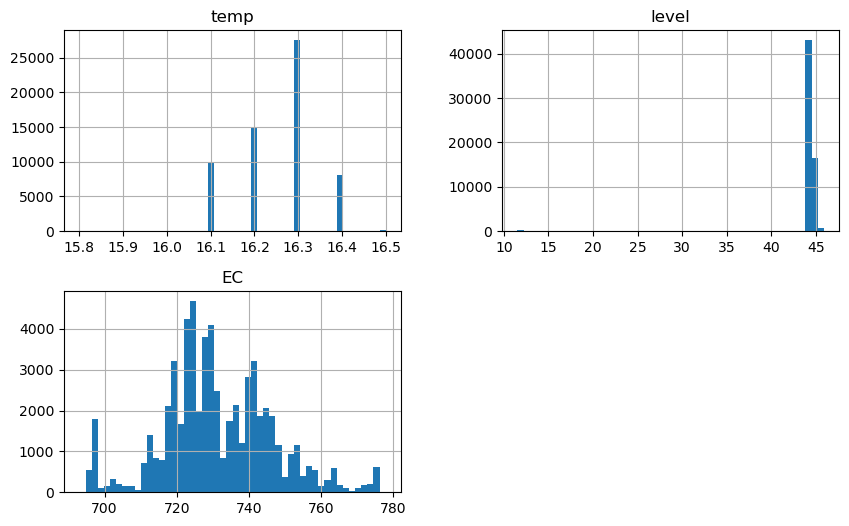

In [75]:
df.hist(bins=50, figsize=(10,6))

plt.show()

In [76]:
#히스토그램으로 데이터 분포를 파악해보자 

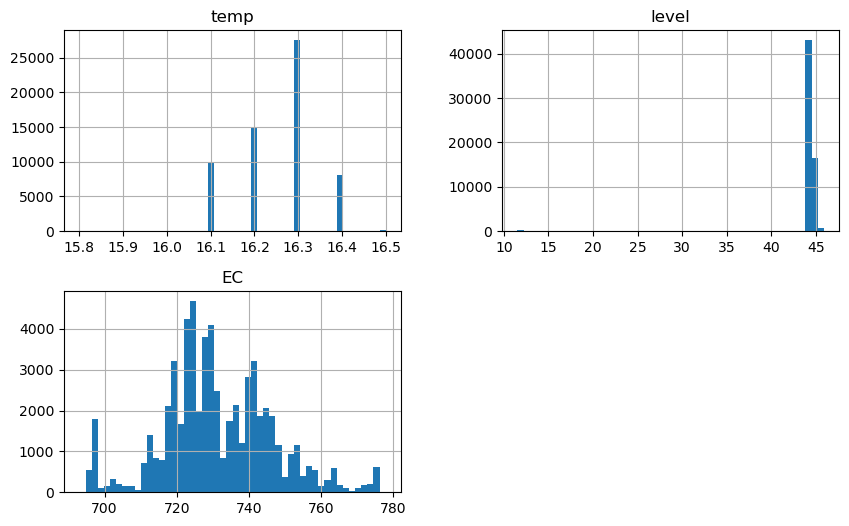

In [77]:
df.hist(bins=50, figsize=(10,6))
plt.show()

상자그래프로 이상치를 확인해보자 

<Axes: >

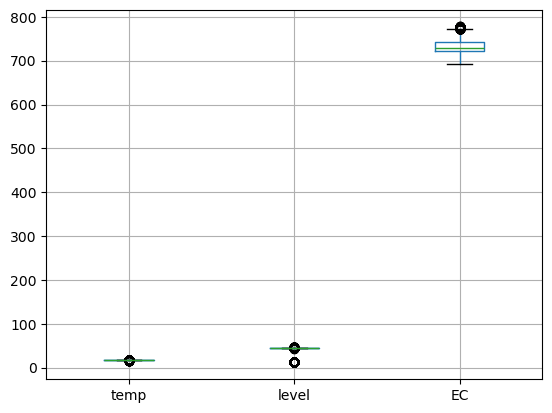

In [78]:
df.boxplot()

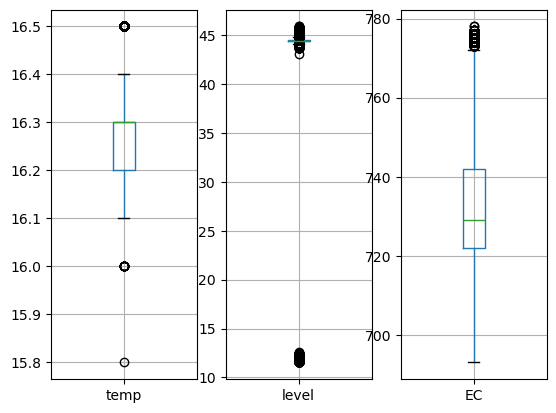

In [79]:
plt.subplot(1, 3, 1)
df.boxplot(column='temp', return_type='both')

plt.subplot(1, 3, 2)
df.boxplot(column='level', return_type='both')

plt.subplot(1, 3, 3)
df.boxplot(column='EC', return_type='both')

plt.show()

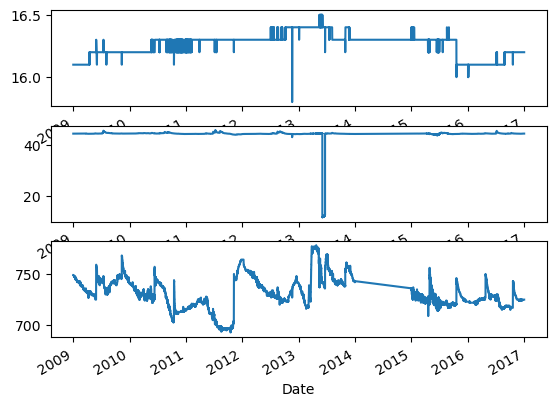

In [80]:
plt.subplot(3, 1, 1)
df['temp'].plot( )

plt.subplot(3, 1, 2)
df['level'].plot()

plt.subplot(3, 1, 3)
df['EC'].plot( )

plt.show( )

In [82]:
#quantile() 함수로 사분위수를 계산할 수 있다. 

In [83]:
q3_level = df['level'].quantile(q=0.75)
q1_level = df['level'].quantile(q=0.25)
iqr_level = q3_level - q1_level
print(iqr_level)

#1사분위수 , 3사분위수 구하고 3사분위수 - 1사분위수 = iqr을 구한다. 

0.1700000000000017


이번에는 최댓값과 최솟값을 알아보자 

In [84]:
upper_level = q3_level + 1.5 * iqr_level
lower_level = q1_level -1.5 * iqr_level
print(upper_level, '/', lower_level)
print((df['level'] > upper_level).sum( )) #최대값을 초과한 것은 이상치 
print((df['level'] < lower_level).sum( )) #최솟값을 초과한 것은 이상치 
#이상치가 몇개인지 보여달라는 말임 

44.795 / 44.114999999999995
4496
1577


이상치는 그럼 어떻게 제거할 것인가? 다음시간에 ppt 49 

*** 11월 25일 

<Axes: xlabel='Date'>

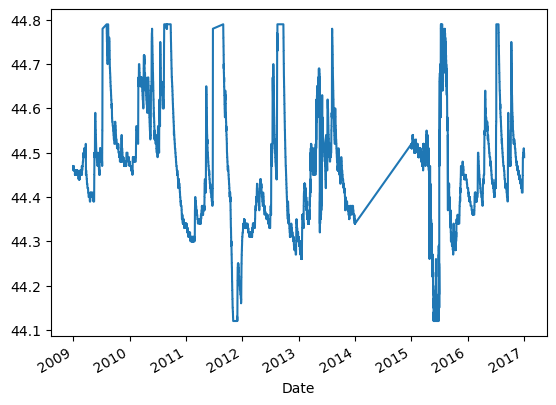

In [85]:
df_iqr_level = df[(df['level'] < upper_level) & (df['level'] > lower_level)]
df_iqr_level['level'].plot( )

In [87]:
#사분위수와IQR 구하기
q3_temp = df['temp'].quantile(q=0.75)
q1_temp = df['temp'].quantile(q=0.25)
iqr_temp = q3_temp-q1_temp
print('IQR:', iqr_temp)

#지하수온상한값, 하한값, 이상치개수구하기

upper_temp = q3_temp + iqr_temp * 1.5
lower_temp = q1_temp -iqr_temp * 1.5 

print(upper_temp, '/', lower_temp) # 상한선 , 하한선 
print((df['temp'] > upper_temp).sum( )) #상한값을 초과하는 데이터들의 갯수 
print((df['temp'] < lower_temp).sum( )) #하한값을 초과하는 데이터들의 갯수 
#전체적으로 수온의 변화는 거의없다.. 왜?

IQR: 0.10000000000000142
16.450000000000003 / 16.049999999999997
226
13


In [88]:
# 이번에도 quantile함수를 이용해서 전기전도도에 대한 iqr과 이상치 개수를 구해보자. 

In [89]:
#사분위수와IQR 구하기
q3_ec = df['EC'].quantile(q=0.75)
q1_ec = df['EC'].quantile(q=0.25)
iqr_ec = q3_ec -q1_ec
print('IQR:', iqr_ec)

#지하수온상한값, 하한값, 이상치개수구하기

upper_ec = q3_ec + iqr_ec * 1.5
lower_ec = q1_ec -iqr_ec * 1.5
print(upper_ec, '/', lower_ec) # 상한선 , 하한선 
print((df['EC'] > upper_ec).sum( ))  #상한값을 초과하는 데이터들의 갯수 
print((df['EC'] < lower_ec).sum( ))   #하한값을 초과하는 데이터들의 갯수

IQR: 20.0
772.0 / 692.0
831
0


In [ ]:
#특성수가 여러개 있을때, 이상치를 한꺼번에 적용해야 데이터의 손실이업다 
# 잘 이해가 안가넴 
# 이상치를 한꺼번에 제거

In [90]:
df_iqr = df[(df['temp'] < upper_temp) & (df['temp'] > lower_temp) &\
 (df['level'] < upper_level) & (df['level'] > lower_level) &\
 (df['EC'] < upper_ec) & (df['EC'] > lower_ec)]

#즉 정상치들만 모아서 이를 저장하면 이상치들은 자동적으로 제거가 되버림 

In [ ]:
#이렇게 이상치들이 제거 후의 통계량을 한번 살펴보자 

In [91]:
df_iqr.describe()

,temp,level,EC
count,53545.000000,53545.000000,53545.000000
mean,16.249973,44.457145,731.406779
std,0.092386,0.120359,13.811769
min,16.100000,44.120000,693.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.450000,730.000000
75%,16.300000,44.520000,741.000000
max,16.400000,44.790000,771.000000


In [92]:
# 이상치들을 제거 한 후의 히스토그램을 살펴보자.

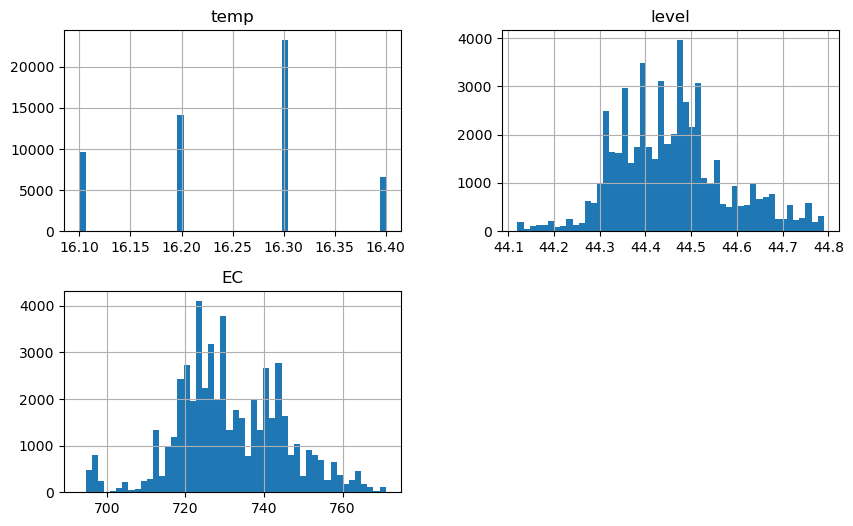

In [93]:
df_iqr.hist(bins = 50 , figsize = (10,6))
plt.show()

In [ ]:
# 이상치 제거 후 상자 그래프를 그려보자. 

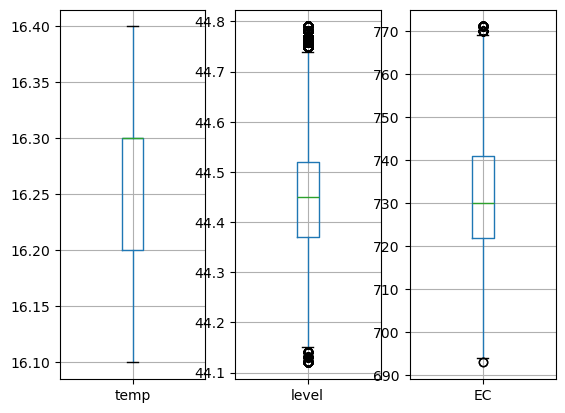

In [94]:
plt.subplot(1, 3, 1) 
df_iqr.boxplot(column= 'temp', return_type = 'both') 
plt.subplot(1, 3, 2) 
df_iqr.boxplot(column='level', return_type='both')
plt.subplot(1, 3, 3) 
df_iqr.boxplot(column = 'EC', return_type='both')
plt.show()

In [ ]:
# 시계열 그래프도 그려보자. 

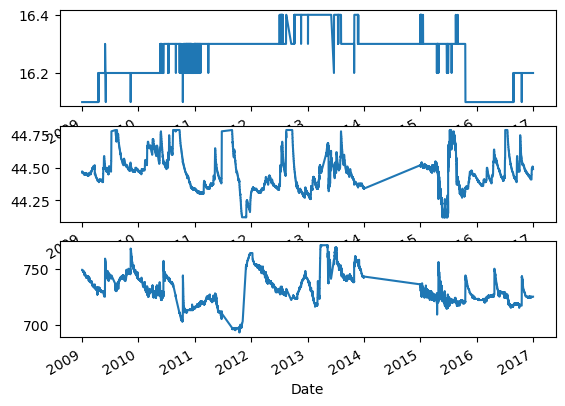

In [95]:
plt.subplot(3, 1, 1)
df_iqr['temp'].plot()
plt.subplot(3, 1, 2) 
df_iqr['level'].plot()
plt.subplot(3, 1, 3) 
df_iqr['EC'].plot()
plt.show()

In [ ]:
# 음 2014~2015년도 자료가 없나보다 나중에 확인해보자. 

In [ ]:
#이렇게 정제된 데이터를 저장해보자. 

In [97]:
df_iqr.to_csv('C://sweet/대전지하수_정제.csv', encoding = 'cp949')

### 표준화와 정규화 

In [ ]:
표준화된 자료를 불러올려면 이 자료를 불러와야함. read_csv를 통해서 

In [ ]:
import pandas as pd
import numpyas np
import matplotlib.pyplotas plt

In [98]:
df = pd.read_csv('./대전지하수_정제.csv')
df.head()

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749
4,2009-01-01 04:00:00,16.1,44.47,749


In [99]:
#파일을 불러왔다면, 두 열을 선택해서 스케일링을 해보자. 
# 스케일링이란 말은 표준화, 정규화 해보자 라는 말임 
# level열과 EC 열을 가지고 스케일링을 해보자 
# 일단 이 열의 통계량을 확인해서 문제를인식해보자. 

In [100]:
df = df[['level', 'EC']]
df.describe()

,level,EC
count,53545.000000,53545.000000
mean,44.457145,731.406779
std,0.120359,13.811769
min,44.120000,693.000000
25%,44.370000,722.000000
50%,44.450000,730.000000
75%,44.520000,741.000000
max,44.790000,771.000000


각각의 열에 대한 std를 주목해보자 지하수 전기전도도는 지하수위보다  
100배 이상으로 산포가 크다고 할 수 있다.   
표준편차가 너무 많이 차이가 난다.  

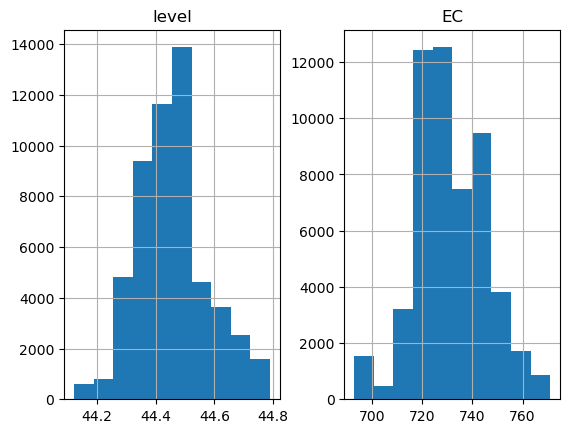

In [101]:
# 히스토그램을 찍어보자 
df.hist()
plt.show()

In [102]:
# 표준화란 ? 정규분포 모양을 그릴 수 있도록 하는것 
# 음.... 대표적으로 z_score 가 들어감 
# x - m / sd(표준편차) 

In [ ]:
# 일단 작업하기 편하도록 사본을 생성해보자. 

In [103]:
df1 = df.copy()
df1

,level,EC
0,44.47,749
1,44.47,749
2,44.47,749
3,44.47,749
4,44.47,749
...,...,...
53540,44.49,725
53541,44.49,725
53542,44.49,725
53543,44.49,725


In [104]:
# 표준화 
# x - m / sd(표준편차)  이 식을 그대로 사용한다. 
df1['level_z_score'] = (df1['level'] - df1['level'].mean() ) / df1['level'].std()
df1['EC_z_score'] = (df1['EC'] - df1['EC'].mean()) /df1['EC'].std()
df1.head(3)

,level,EC,level_z_score,EC_z_score
0,44.47,749,0.106808,1.273785
1,44.47,749,0.106808,1.273785
2,44.47,749,0.106808,1.273785


In [105]:
# 즉 지하수위와 전기전도도 를 각각 표준화한 열이 추가된다. 

In [106]:
# 그럼 이제 통계량과 히스토그램으로 위에 했던 표준화가 잘 수행되었는지 확인해보자 

In [107]:
df1.describe()

,level,EC,level_z_score,EC_z_score
count,53545.000000,53545.000000,5.354500e+04,5.354500e+04
mean,44.457145,731.406779,-1.181349e-14,3.142339e-16
std,0.120359,13.811769,1.000000e+00,1.000000e+00
min,44.120000,693.000000,-2.801158e+00,-2.780729e+00
25%,44.370000,722.000000,-7.240391e-01,-6.810699e-01
50%,44.450000,730.000000,-5.936110e-02,-1.018537e-01
75%,44.520000,741.000000,5.222321e-01,6.945686e-01
max,44.790000,771.000000,2.765520e+00,2.866629e+00


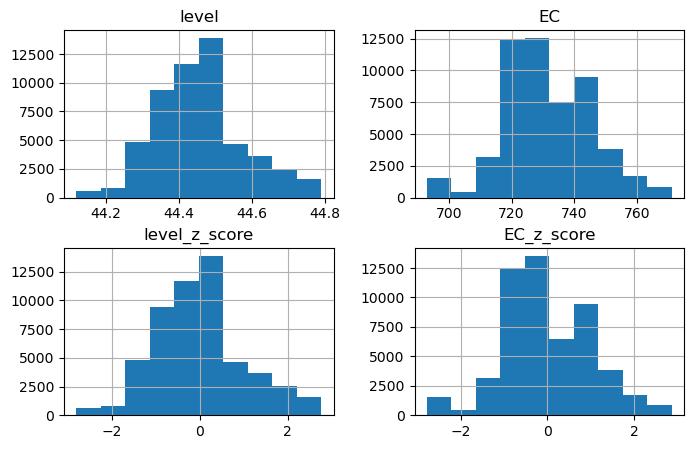

In [108]:
df1.hist(figsize= (8, 5)) 
plt.show()

표준화 후 데이터가 평균 0 을 중심으로 비슷한 범위에 분포 

In [ ]:
df2 = df.copy()
df2_standard = (df2-df2.mean())/ df2.std()
df2_standard.head(3)

정규화에 대해서 한번 알아보자 

In [109]:
# 정규화는 데이터의 최댓값과 최솟값을 이용하여 0 에서 1 사이의 값으로 변환하는 전처리 과정이다. 


In [110]:
df3 = df.copy()

df3['level_minmax'] = (df3['level'] - df3['level'].min())  / (df3['level'].max() \
            -df3['level'].min()) 
df3['EC_minmax'] = (df3['EC'] - df3['EC'].min()) / (df3['EC'].max() - df3['EC'].min())



,level,EC,level_minmax,EC_minmax
0,44.47,749,0.522388,0.717949
1,44.47,749,0.522388,0.717949
2,44.47,749,0.522388,0.717949
3,44.47,749,0.522388,0.717949
4,44.47,749,0.522388,0.717949
...,...,...,...,...
53540,44.49,725,0.552239,0.410256
53541,44.49,725,0.552239,0.410256
53542,44.49,725,0.552239,0.410256
53543,44.49,725,0.552239,0.410256


In [111]:
df3.describe()

,level,EC,level_minmax,EC_minmax
count,53545.000000,53545.000000,53545.000000,53545.000000
mean,44.457145,731.406779,0.503201,0.492395
std,0.120359,13.811769,0.179640,0.177074
min,44.120000,693.000000,0.000000,0.000000
25%,44.370000,722.000000,0.373134,0.371795
50%,44.450000,730.000000,0.492537,0.474359
75%,44.520000,741.000000,0.597015,0.615385
max,44.790000,771.000000,1.000000,1.000000


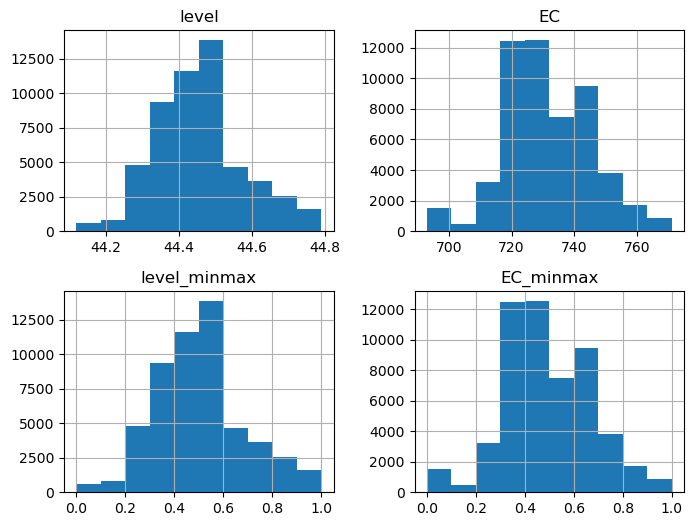

In [112]:
df3.hist(figsize=(8, 6))
plt.show()

### 타이타닉 탑승자 데이터 전처리 

In [113]:
import pandas as pd
df = pd.read_csv('./titanic.csv')
df.shape

(891, 12)

In [114]:
# 승객이 891명이고 열은 12개

In [115]:
df.isnull().sum()
# isnull()함수로 각 열의 결측치를 확인해본다

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [116]:
# 지금 12개의 컬럼(속성)중에 891명의승객중에 나이를 모르겠는 승객이 177명임 
# 그리고 어느 선실에 들어갔는지 모르는 혹은 선실이 없는 승객(추측해본바) 687명임 
# 이를 전처리 해야함 
# 교수님이 볼땐 나이는.. 결측치를 행앞뒤로 하는건 아니라고 생각함. 그렇다면 평균..? 

In [117]:
# 그다음에 요금에 대해서 ..

In [ ]:
# 요금에 이상치가 생겼다는 것은... 
# 요금이 책정되어 있는데, 그냥 부자라서 기분좋게 돈 주는 경우를 뜻함 

In [118]:
q1 = df['Fare'].quantile(.25)
q3 = df['Fare'].quantile(.75)
IQR = q3 - q1 
print('하한값:' , q1 - 1.5*IQR , "상한값:", q3 + 1.5*IQR)

out1 = df[df['Fare'] < (q1 - 1.5*IQR)]
out2 = df[df['Fare'] > (q3 + 1.5*IQR)]

len(out1) , len(out2)

하한값: -26.724 상한값: 65.6344


(0, 116)

In [ ]:
# 보니깐 상한값보다 요금을 더 낸 사람이 116명임!
# 하한값보다 덜 낸 승객은 없다. 

In [119]:
sum(out2['Sex'] == 'male')

46

In [120]:
# 특별히 요금을 많이 낸 승객중에 남성이 46명임 
# 그리고 116 - 46 = 70명이 여성이다. 